In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re
from datetime import datetime

keywords = ['ROBOT', 'DATA', 'PROTOCOL', 'STAGE', 'CAMERA']
time_dict = {keyword: 0 for keyword in keywords}

with open('./LOGS/K29004_log_2025-03-17_16-22-39.txt', 'r') as file:
    first_line = True
    previous_time = None
    for line in file:
        if first_line:
            first_line = False
            continue
        time_match = re.search(r'\d{2}:\d{2}:\d{2},\d{3}', line)
        keyword_match = any(keyword in line for keyword in keywords)
        if time_match and keyword_match:
            current_time = datetime.strptime(time_match.group(), '%H:%M:%S,%f')
            if previous_time:
                time_diff = current_time - previous_time
                for keyword in keywords:
                    if re.search(keyword, line):
                        time_dict[keyword] += time_diff.total_seconds()
            previous_time = current_time

print(time_dict)


Matplotlib is building the font cache; this may take a moment.


{'ROBOT': 9854.663999999999, 'DATA': 57.56299999999859, 'PROTOCOL': 16.423000000000005, 'STAGE': 930.5079999999984, 'CAMERA': 0, 'ERROR': 0}


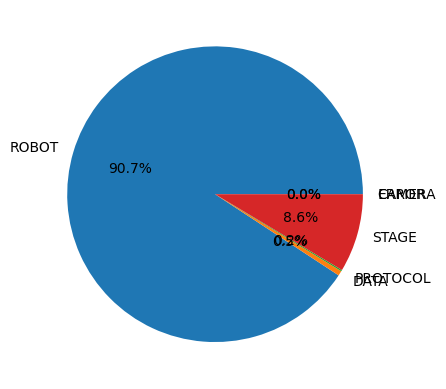

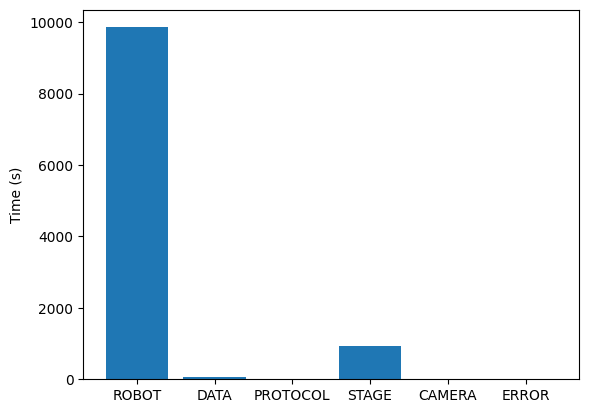

In [20]:
labels = time_dict.keys()
data = time_dict.values()

plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.show()
plt.bar(labels, data)
plt.ylabel("Time (s)")
plt.show()